Will create 2 Bar charts:

(1) The unemployment rates among different age groups in NM in 2019

(2) The unemployment rates by educational attainment in NM in 2019

Data was obtained from U.S. Census: 
https://data.census.gov/cedsci/table?q=new%20mexico%20employment&tid=ACSST1Y2019.S2301&moe=false&hidePreview=true


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Unemplpyment rate.csv")
df

,Age,Population,Labor Force Participation Rate,Employment/\nPopulation Ratio,Unemployment rate
0,16 to 19 years,"114,480",38.80%,32.60%,14.20%
1,20 to 24 years,"137,719",73.90%,66.40%,6.30%
2,25 to 29 years,"143,017",77.00%,69.80%,7.20%
3,30 to 34 years,"135,610",79.10%,73.00%,6.40%
4,35 to 44 years,"261,847",77.60%,72.70%,5.00%
5,45 to 54 years,"235,075",77.10%,73.80%,3.90%
6,55 to 59 years,"132,366",67.70%,65.20%,3.70%
7,60 to 64 years,"140,343",49.70%,47.90%,3.60%
8,65 to 74 years,"224,011",25.00%,23.90%,4.30%
9,75 years and over,"153,719",6.20%,6.00%,3.20%


In [3]:
df.columns

Index(['Age', 'Population ', 'Labor Force Participation Rate',
       'Employment/\nPopulation Ratio', 'Unemployment rate'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
df.rename(index=str, columns={"Employment/\nPopulation Ratio": "Employment Population Ratio", "Unemployment rate": "Unemployment Rate"}, inplace=True)
df

,Age,Population,Labor Force Participation Rate,Employment Population Ratio,Unemployment Rate
0,16 to 19 years,"114,480",38.80%,32.60%,14.20%
1,20 to 24 years,"137,719",73.90%,66.40%,6.30%
2,25 to 29 years,"143,017",77.00%,69.80%,7.20%
3,30 to 34 years,"135,610",79.10%,73.00%,6.40%
4,35 to 44 years,"261,847",77.60%,72.70%,5.00%
5,45 to 54 years,"235,075",77.10%,73.80%,3.90%
6,55 to 59 years,"132,366",67.70%,65.20%,3.70%
7,60 to 64 years,"140,343",49.70%,47.90%,3.60%
8,65 to 74 years,"224,011",25.00%,23.90%,4.30%
9,75 years and over,"153,719",6.20%,6.00%,3.20%


In [6]:
df_unemp = df[["Age", "Unemployment Rate"]]

df_unemp.set_index("Age", inplace=True)

df_unemp

,Unemployment Rate
Age,
16 to 19 years,14.20%
20 to 24 years,6.30%
25 to 29 years,7.20%
30 to 34 years,6.40%
35 to 44 years,5.00%
45 to 54 years,3.90%
55 to 59 years,3.70%
60 to 64 years,3.60%
65 to 74 years,4.30%


In [7]:
df_unemp.dtypes

Unemployment Rate    object
dtype: object

In [8]:
df_unemp=df_unemp.replace('%','',regex=True).astype(float)
df_unemp

,Unemployment Rate
Age,
16 to 19 years,14.2
20 to 24 years,6.3
25 to 29 years,7.2
30 to 34 years,6.4
35 to 44 years,5.0
45 to 54 years,3.9
55 to 59 years,3.7
60 to 64 years,3.6
65 to 74 years,4.3


In [9]:
df_unemp.dtypes

Unemployment Rate    float64
dtype: object

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

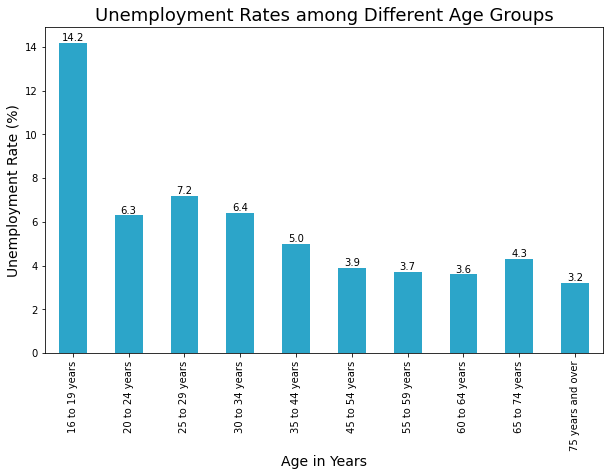

In [12]:
ax = df_unemp.plot(kind='bar', figsize=(10, 6), legend=None, color='#2ca5c9')

ax.set_xlabel('Age in Years', fontsize=14) # add to x-label to the plot
ax.set_ylabel('Unemployment Rate (%)', fontsize=14) # add y-label to the plot
ax.set_title('Unemployment Rates among Different Age Groups', fontsize=18) # add title to the plot


for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.1f'),  
                   (bar.get_x() + bar.get_width()/ 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 5), 
                   textcoords='offset points') 

plt.show()

In [13]:
df2 = pd.read_csv("Unemployment Rate Education.csv")
df2

,EDUCATIONAL ATTAINMENT,Population,Labor Force Participation Rate,Employment/\nPopulation Ratio,Unemployment rate
0,Less than high school graduate,"139,037",55.00%,50.40%,8.40%
1,High school graduate,"281,886",66.50%,61.90%,6.60%
2,Some college or associate's degree,"352,226",75.30%,70.50%,4.90%
3,Bachelor's degree or higher,"275,109",84.20%,81.30%,2.60%


In [14]:
df2.rename(index=str, columns={"Employment/\nPopulation Ratio": "Employment Population Ratio"}, inplace=True)
df2

,EDUCATIONAL ATTAINMENT,Population,Labor Force Participation Rate,Employment Population Ratio,Unemployment rate
0,Less than high school graduate,"139,037",55.00%,50.40%,8.40%
1,High school graduate,"281,886",66.50%,61.90%,6.60%
2,Some college or associate's degree,"352,226",75.30%,70.50%,4.90%
3,Bachelor's degree or higher,"275,109",84.20%,81.30%,2.60%


In [15]:
df_edu = df2[["EDUCATIONAL ATTAINMENT", "Unemployment rate"]]

df_edu.set_index("EDUCATIONAL ATTAINMENT", inplace=True)

df_edu

,Unemployment rate
EDUCATIONAL ATTAINMENT,
Less than high school graduate,8.40%
High school graduate,6.60%
Some college or associate's degree,4.90%
Bachelor's degree or higher,2.60%


In [16]:
df_edu.dtypes

Unemployment rate    object
dtype: object

In [17]:
df_edu=df_edu.replace('%','',regex=True).astype(float)
df_edu

,Unemployment rate
EDUCATIONAL ATTAINMENT,
Less than high school graduate,8.4
High school graduate,6.6
Some college or associate's degree,4.9
Bachelor's degree or higher,2.6


In [18]:
df_edu.dtypes

Unemployment rate    float64
dtype: object

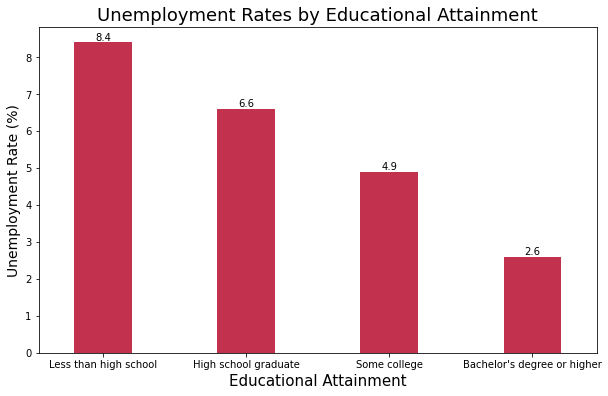

In [19]:
ax2 = df_edu.plot(kind='bar', figsize=(10, 6), width=0.4, legend=None, color='#c2324f')

ax2.set_xlabel('Educational Attainment', fontsize=15) 
ax2.set_ylabel('Unemployment Rate (%)', fontsize=14) 
ax2.set_title('Unemployment Rates by Educational Attainment', fontsize=18) 
ax2.set_xticklabels(["Less than high school", "High school graduate", "Some college", "Bachelor's degree or higher"], rotation=0, fontsize=10)


for bar in ax2.patches: 
    ax2.annotate(format(bar.get_height(), '.1f'),  
                   (bar.get_x() + bar.get_width()/ 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 5), 
                   textcoords='offset points') 

plt.show()